<a href="https://colab.research.google.com/github/Mariyselita/TLN/blob/main/TLN_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath = '/content/drive/My Drive/TLN/e990624_mod.htm'

In [3]:
with open(filepath, 'r', encoding='utf-8') as file:
    content = file.read()

In [4]:
import pandas as pd
from bs4 import BeautifulSoup
import re

In [5]:
# Usar BeautifulSoup para extraer texto del HTML
soup = BeautifulSoup(content, 'html.parser')
text = soup.get_text(separator=' ')

In [6]:
# Corregir "anos" por "años"
text = text.replace('anos', 'años')

# Crear un DataFrame
data = pd.DataFrame({'text': [text]})

# Remover puntuación y otros caracteres especiales, pero mantener las "ñ"
data['text_processed'] = data['text'].map(lambda x: re.sub(r'[^\w\sñ]', '', x))
data['text_processed'] = data['text_processed'].map(lambda x: x.lower())

# Verificar y reemplazar "anos" por "años" en el texto procesado nuevamente
data['text_processed'] = data['text_processed'].map(lambda x: x.replace('anos', 'años'))

# Ver las primeras filas del texto procesado
print(data['text_processed'].head())

0    \n \n \n \n e990624_modhtm \n \n \n\nhttpwwwex...
Name: text_processed, dtype: object


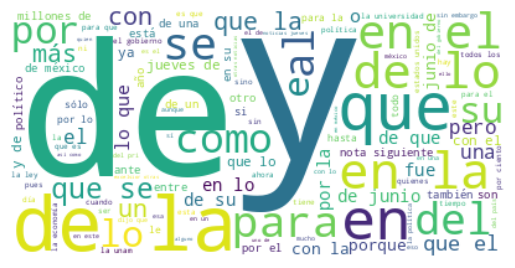

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir el texto procesado
long_string = ' '.join(data['text_processed'].values)

# Crear un objeto WordCloud
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generar la nube de palabras
wordcloud.generate(long_string)

# Visualizar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
stop_words.extend(['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words = list(sent_to_words(data['text_processed'].values.tolist()))
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['art', 'html', 'excelsior', 'editorial', 'jueves', 'junio', 'epigrama', 'jorge', 'mansilla', 'torres', 'hombre', 'empezo', 'hablar', 'hace', 'dos', 'medio', 'millones', 'anos', 'segun', 'neurobiologo', 'terry', 'deacon', 'universidad', 'harvard', 'tiempo', 'espanto', 'si', 'quiere', 'suponer', 'tardar']


In [12]:
data_words = list(sent_to_words(data['text_processed'].values.tolist()))
data_words = [[word.replace('anos', 'años') for word in doc] for doc in data_words]
data_words = remove_stopwords(data_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
import gensim.corpora as corpora

# Crear diccionario
id2word = corpora.Dictionary(data_words)

# Crear el corpus
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

# Ver el corpus
print(corpus[:1][0][:30])

# Entrenar el modelo LDA
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Imprimir los temas del modelo LDA
from pprint import pprint
pprint(lda_model.print_topics())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 2), (1, 8), (2, 2), (3, 2), (4, 2), (5, 4), (6, 4), (7, 2), (8, 2), (9, 2), (10, 2), (11, 8), (12, 2), (13, 2), (14, 4), (15, 2), (16, 6), (17, 2), (18, 6), (19, 4), (20, 2), (21, 6), (22, 4), (23, 2), (24, 6), (25, 4), (26, 2), (27, 2), (28, 2), (29, 2)]
[(0,
  '0.005*"mexico" + 0.005*"gobierno" + 0.004*"mas" + 0.003*"junio" + '
  '0.003*"si" + 0.002*"nota" + 0.002*"pri" + 0.002*"html" + 0.002*"tambien" + '
  '0.002*"años"'),
 (1,
  '0.007*"mas" + 0.004*"mexico" + 0.003*"gobierno" + 0.003*"si" + 0.003*"años" '
  '+ 0.003*"excelsior" + 0.003*"junio" + 0.002*"nota" + 0.002*"pais" + '
  '0.002*"dijo"'),
 (2,
  '0.006*"mas" + 0.005*"mexico" + 0.004*"si" + 0.004*"gobierno" + '
  '0.003*"junio" + 0.003*"pais" + 0.002*"html" + 0.002*"excelsior" + '
  '0.002*"dijo" + 0.002*"politica"'),
 (3,
  '0.006*"mas" + 0.004*"mexico" + 0.004*"gobierno" + 0.003*"junio" + '
  '0.003*"si" + 0.003*"pri" + 0.002*"millones" + 0.002*"siguiente" + '
  '0.002*"años" + 0.002*"excelsior"'),
 (4,
  '0.006*"mas

In [16]:
import pandas as pd
import itertools

# Función para calcular las frecuencias de las palabras
def freq(data_words):
    word_freq = {}

    for word in data_words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

    # Convertir el diccionario a un DataFrame
    df = pd.DataFrame.from_records(list(word_freq.items()), columns=['Word', 'Frequency'])

    return df

# Aplanar la lista de listas en una sola lista de palabras
data_words_flat = list(itertools.chain.from_iterable(data_words))

# Calcular las frecuencias
frequency = freq(data_words_flat)

# Ordenar por frecuencia en orden descendente
frequency = frequency.sort_values(by="Frequency", ascending=False)

# Guardar el resultado en un archivo CSV
frequency.to_csv('/content/drive/My Drive/TLN/frequency.csv', index=False)

# Mostrar las primeras filas del DataFrame de frecuencias
print(frequency.head())

         Word  Frequency
42        mas        436
157    mexico        300
527  gobierno        272
26         si        242
5       junio        204


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
!pip install pyLDAvis
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:00


In [17]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualizar los temas
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Guardar y cargar los datos pre-preparados de pyLDAvis
LDAvis_data_filepath = '/content/drive/My Drive/TLN/ldavis_prepared_'+str(num_topics)+'.html'
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                  x         y  topics  cluster       Freq
topic                                                    
4      2.251816e-03  0.002199       1        1  94.277087
9      1.627863e-03 -0.001332       2        1   3.813858
6      1.252103e-03 -0.001030       3        1   1.205601
5      7.937089e-04 -0.000711       4        1   0.633640
2      9.369567e-08  0.000467       5        1   0.068940
3     -4.421793e-04  0.000034       6        1   0.000175
8     -8.949461e-04  0.000017       7        1   0.000175
7     -6.450904e-04 -0.000382       8        1   0.000175
1     -1.403975e-03  0.000643       9        1   0.000175
0     -2.539394e-03  0.000096      10        1   0.000175, topic_info=            Term        Freq       Total Category  logprob  loglift
5170         mas  371.000000  371.000000  Default  30.0000  30.0000
5324      mexico  245.000000  245.000000  Default  29.0000  29.0000
4000    gobierno  255.000000  255.000000  Default  28.0000  28.0000
7661          si  214.000000  214.000000  Default  27.0000  27.0000
4775       junio  201.000000  201.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
6004     partido    0.000163  118.104472  Topic10  -6.4216  -0.2347
5536    nacional    0.000178  153.274822  Topic10  -6.3370  -0.4108
2512  desarrollo    0.000159  132.977119  Topic10  -6.4462  -0.3779
6583     proceso    0.000137   86.768617  Topic10  -6.5945  -0.0993
3949     general    0.000140   94.912400  Topic10  -6.5764  -0.1708

[872 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
85        1  0.930599    acciones
85        2  0.035792    acciones
85        3  0.017896    acciones
115       1  1.056409       acnur
151       1  0.936465      actual
...     ...       ...         ...
8526      3  0.019434        vida
8550      1  0.837168  villanueva
8564      1  0.987602    violenta
8648      1  0.934458      warren
8654      1  0.963648  woldenberg

[712 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 7, 6, 3, 4, 9, 8, 2, 1])